# Praca domowa 3
Autorzy: Daniel Tytkowski, Jan Skwarek

## Wstęp

Zacznijmy od zaimportowania standardowych pakietów.

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
# np.random.seed(23)

Wczytajmy dane, na których będziemy pracować.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/datasets/data.csv')

Dokonajmy podziału na zbiór do budowania, testowy i walidacyjny.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['Bankrupt?']

In [ ]:
X = df.drop(['Bankrupt?'], axis=1)

Dla walidatorów: 'random_state' ustawiony na '420'.

In [ ]:
X_build, X_val, y_build, y_vali =train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_build, y_build, test_size=0.3, random_state=42)

## EDA

Zobaczmy jak wyglądają nasze dane.

In [ ]:
X_train.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
2544,0.452104,0.522841,0.507040,0.616202,0.617218,0.998884,0.797301,0.809248,0.303548,0.781471,...,0.787561,0.004019,0.623600,0.616202,0.839263,0.281417,0.026247,0.559801,1,0.024604
2611,0.495881,0.561055,0.545211,0.602077,0.602135,0.999020,0.797489,0.809390,0.303591,0.781651,...,0.810996,0.005472,0.623634,0.602073,0.841182,0.279002,0.026947,0.565808,1,0.032636
1689,0.556184,0.606029,0.598694,0.613536,0.613536,0.999087,0.797531,0.809425,0.303525,0.781692,...,0.843401,0.000210,0.623967,0.613534,0.842731,0.276239,0.026791,0.565158,1,0.072365
1062,0.552089,0.605266,0.587879,0.604542,0.604578,0.999031,0.797658,0.809502,0.303864,0.781775,...,0.836236,0.000968,0.623850,0.604538,0.842807,0.277962,0.026800,0.565201,1,0.039740
5541,0.518598,0.571522,0.563413,0.614357,0.614357,0.999123,0.797590,0.809454,0.303552,0.781722,...,0.818730,0.001967,0.624469,0.614355,0.841577,0.277791,0.026839,0.565379,1,0.041365


In [ ]:
X_train.shape

(3341, 95)

In [ ]:
X_train.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,...,3341.000000,3.341000e+03,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.0,3341.000000
mean,0.506394,0.559923,0.554648,0.608057,0.608043,0.998838,0.797229,0.809089,0.303518,0.781430,...,0.808386,1.832685e+07,0.623767,0.608055,0.840435,0.280280,0.027389,0.565182,1.0,0.048522
std,0.060868,0.065556,0.061606,0.017777,0.017762,0.006803,0.012108,0.014789,0.010404,0.012013,...,0.041672,3.954910e+08,0.014752,0.017777,0.016545,0.011464,0.010406,0.014874,0.0,0.055445
min,0.000000,0.006923,0.000000,0.000000,0.000000,0.612132,0.160516,0.000000,0.000000,0.133479,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.133503,0.000000,0.000000,1.0,0.000000
25%,0.476868,0.536361,0.527812,0.600564,0.600556,0.998972,0.797387,0.809313,0.303465,0.781569,...,0.797158,9.148606e-04,0.623640,0.600562,0.840153,0.276934,0.026791,0.565158,1.0,0.024576
50%,0.504168,0.561110,0.553402,0.606163,0.606149,0.999025,0.797467,0.809378,0.303524,0.781638,...,0.811257,2.113195e-03,0.623877,0.606165,0.841217,0.278786,0.026808,0.565253,1.0,0.033747
75%,0.537074,0.590057,0.585149,0.613738,0.613723,0.999098,0.797583,0.809472,0.303586,0.781737,...,0.826888,5.303766e-03,0.624191,0.613738,0.842343,0.281410,0.026915,0.565732,1.0,0.053096
max,0.971530,1.000000,1.000000,1.000000,1.000000,0.999635,1.000000,1.000000,0.730252,1.000000,...,0.982879,9.820000e+09,0.956387,1.000000,1.000000,0.745352,0.540672,0.735958,1.0,1.000000


Sprawdźmy braki danych.

In [ ]:
X_train.isna().sum().sort_values(ascending=False)

 ROA(C) before interest and depreciation before interest    0
 Operating Funds to Liability                               0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
                                                           ..
 Net Value Growth Rate                                      0
 Total Asset Growth Rate                                    0
 Continuous Net Profit Growth Rate                          0
 Regular Net Profit Growth Rate                             0
 Equity to Liability                                        0
Length: 95, dtype: int64

In [ ]:
X_train.nunique().sort_values(ascending=False)

 Equity to Liability                    3341
 CFO to Assets                          3341
 Cash Flow to Total Assets              3341
 Current Liability to Equity            3341
 Current Liabilities/Equity             3341
                                        ... 
 Interest-bearing debt interest rate     877
 Net Worth Turnover Rate (times)         579
 Total Asset Turnover                    323
 Liability-Assets Flag                     2
 Net Income Flag                           1
Length: 95, dtype: int64

'Net Income Flag' w naszym zbiorze przyjmuje tylko jedną wartość, natomiast 'Liability-Assets Flag' przyjmuje tylko dwie wartości. Przyjrzyjmy się im bardziej.

In [ ]:
X_train[' Liability-Assets Flag'].value_counts()

0    3336
1       5
Name:  Liability-Assets Flag, dtype: int64

Tylko sześć wartości przyjmuje wartość '1'. Obejrzyjmy je sobie.

In [ ]:
X_train.loc[df[' Liability-Assets Flag'] == 1]

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
56,0.066933,0.057185,0.054821,0.601861,0.601861,0.998825,0.796779,0.808717,0.302760,0.780927,...,0.525651,5.803037e-03,0.623648,0.601857,1.000000,0.182790,0.026763,0.565021,1,0.009178
2001,0.438795,0.090166,0.464586,0.540776,0.540776,0.997789,0.790787,0.802967,0.294457,0.780105,...,0.411809,1.109791e-02,0.625487,0.540775,0.996912,0.209222,0.026779,0.565098,1,0.008753
6613,0.279676,0.283362,0.303014,0.637520,0.637520,0.998785,0.797055,0.809000,0.303325,0.781234,...,0.705559,3.030000e+09,0.623292,0.637516,0.841826,0.265220,0.026791,0.565158,1,0.000000
2735,0.436894,0.453718,0.479522,0.585062,0.585062,0.998495,0.796770,0.808785,0.303434,0.781002,...,0.747290,4.202211e-04,0.557613,0.585059,0.885473,0.133503,0.026744,0.564922,1,0.009546
6640,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,0.780388,...,0.519388,1.758765e-02,0.623465,0.598051,0.856906,0.259280,0.026769,0.565052,1,0.003946


Nie róbmy na razie nic z tą zmienną (wedle polecenia EDA ma być - podobnie jak preprocessing - szczątkowa).

In [ ]:
X_train[' Net Income Flag'].value_counts()

1    3341
Name:  Net Income Flag, dtype: int64

Jedna wartość zmiennej dla każdego rzędu. Bezużyteczna dla nas zmienna. Zobaczmy histogramy.

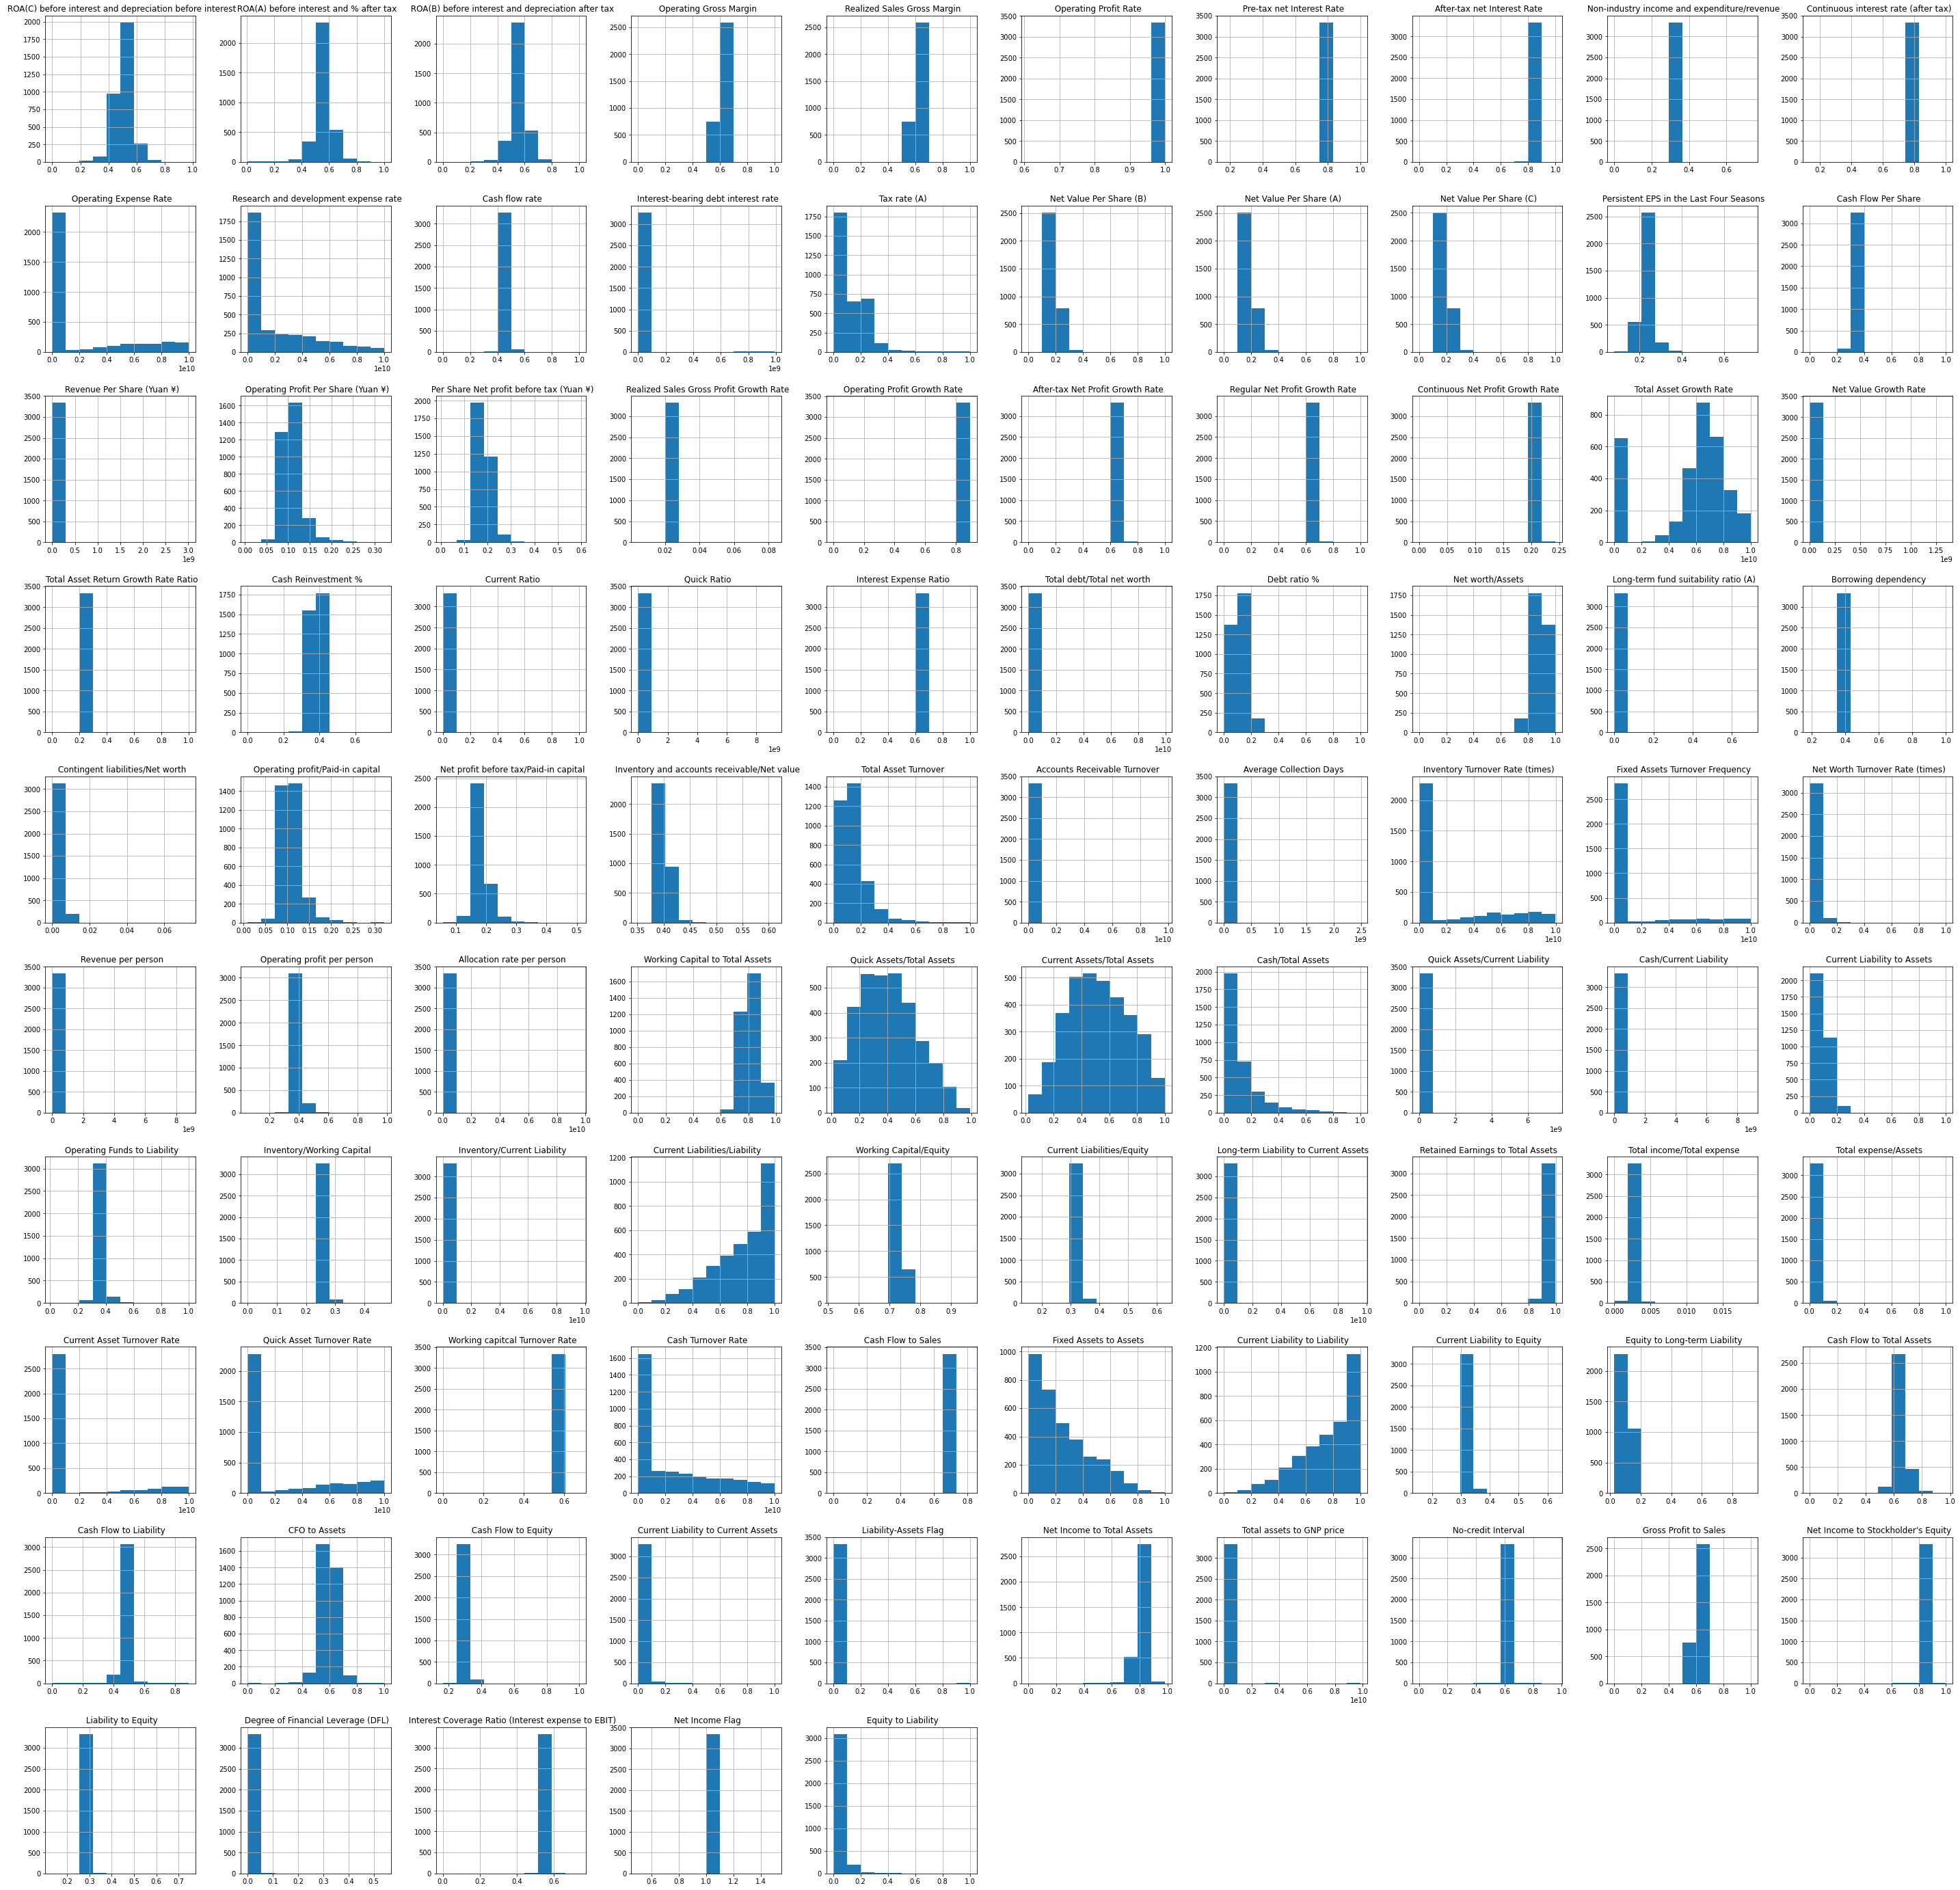

In [ ]:
X_train.hist(figsize=(50, 50))
plt.show()

Zbadajmy jeszcze zmienną celu.

In [ ]:
y_train.head()

2544    0
2611    0
1689    0
1062    0
5541    0
Name: Bankrupt?, dtype: int64

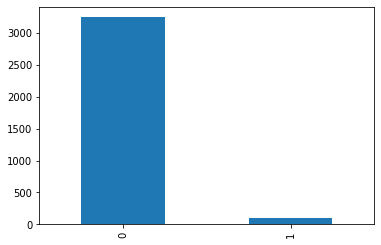

In [ ]:
y_train.value_counts().plot(kind="bar")

In [ ]:
y_train.value_counts()

0    3242
1      99
Name: Bankrupt?, dtype: int64

Jak można było się spodziewać, zmienna celu nie jest równomiernie rozłożona. Zobaczmy sobie na koniec jak zmienne ze sobą korelują.

In [ ]:
! pip install dython
from dython.nominal import associations

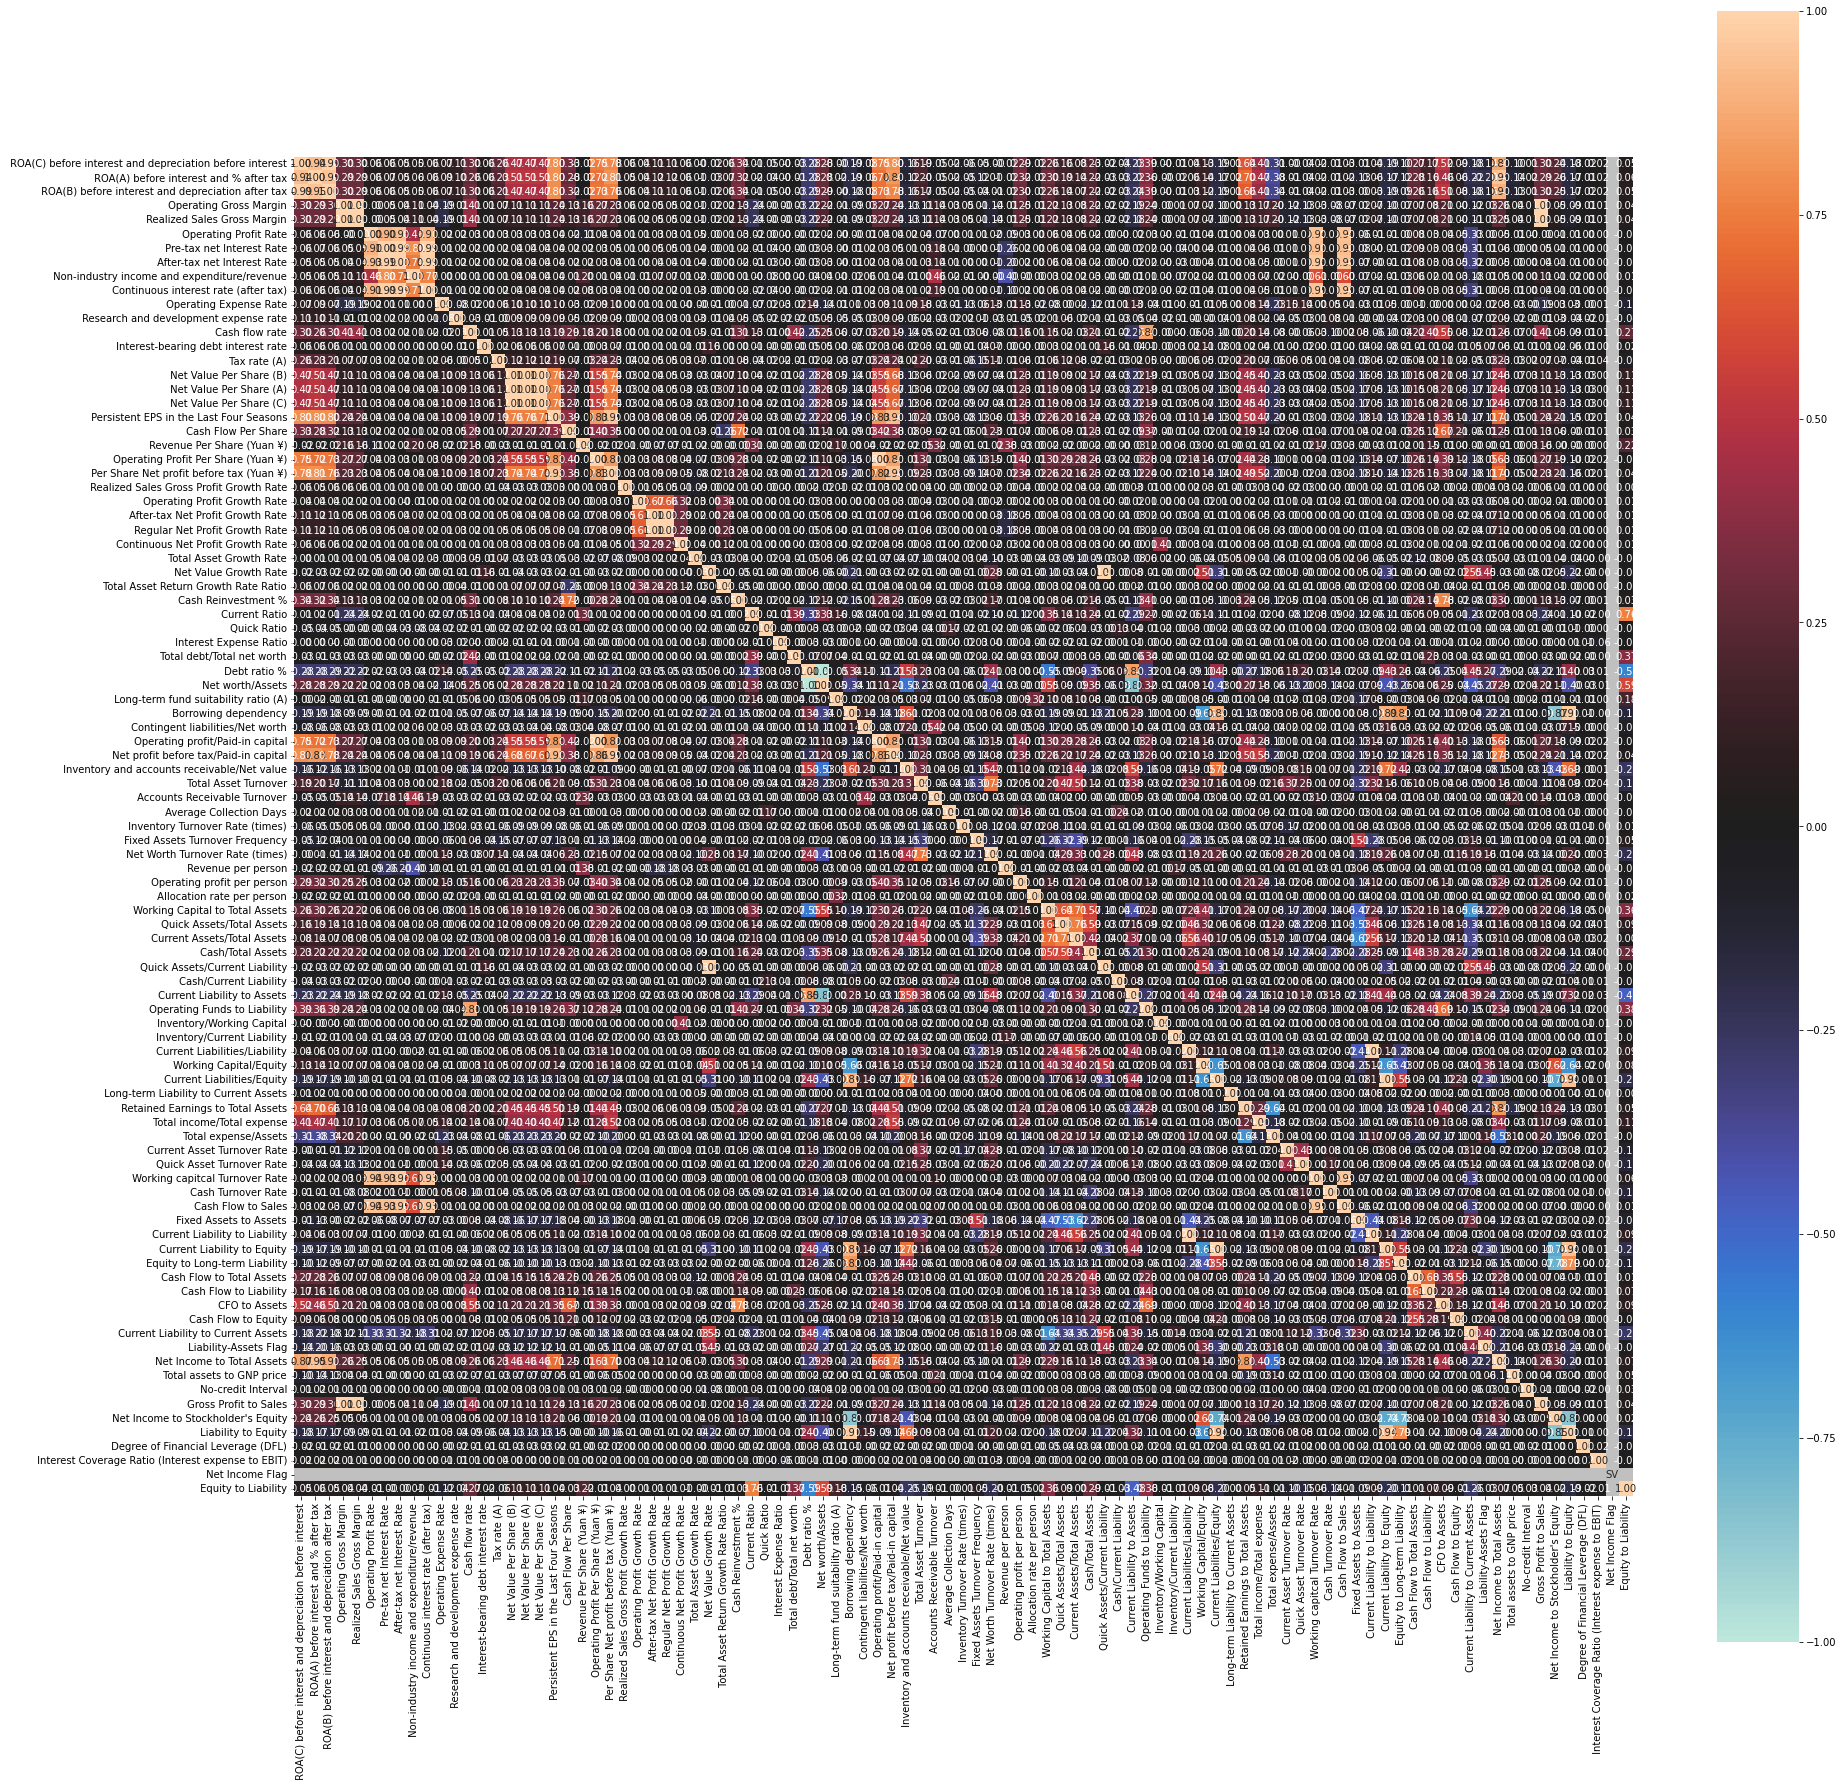

In [ ]:
complete_correlation = associations(X_train, figsize=(30,30))

## Preprocessing

Zastąpmy sobie skrajne wartości percentylami. Postąpimy tak dla każdej zmiennej, która nie jest dyskretna.

In [ ]:
for col in X_train[X_train.columns.drop([' Liability-Assets Flag', ' Net Income Flag'])].columns:
  p_025 = X_train[col].quantile(0.025) # 5th quantile
  p_975 = X_train[col].quantile(0.975) # 95th quantile
  X_train[col].clip(p_025, p_975, inplace=True)
  #od razu na testowym to samo, zeby miec te same kwantyle
  X_test[col].clip(p_025, p_975, inplace=True)

Zmieńmy kierunek zmiennych ujemnie skorelowanych.

In [ ]:
import scipy.stats as ss

In [ ]:
X_train['Bankrupt?']=y_train

In [ ]:
for column in X_train.columns:
  if(ss.pearsonr(X_train['Bankrupt?'], X_train[column])[0]<0):
    X_train[column]=-X_train[column]
# korelacja Pearsona

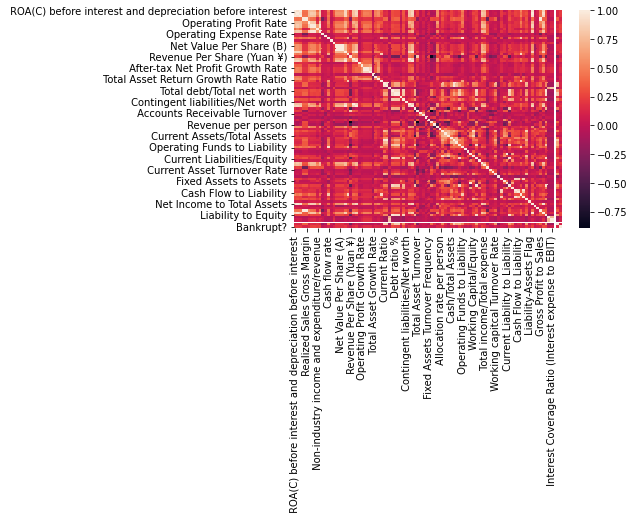

In [ ]:
sns.heatmap(X_train.corr())

In [ ]:
X_train = X_train.drop(['Bankrupt?'],axis=1)

Znormalizujmy dane MinMaxScaler'em.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train.loc[:, ~X_train.columns.isin([' Net Income Flag', ' Liability-Assets Flag'])] = scaler.fit_transform(X_train.loc[:, ~X_train.columns.isin([' Net Income Flag', ' Liability-Assets Flag'])])

In [ ]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
2544,0.718692,0.596176,0.669927,0.478572,0.456413,0.520554,0.428896,0.393777,0.458907,0.431110,...,0.553463,0.052738,0.472833,0.478584,0.468632,0.351855,0.960332,1.000000,1,0.936130
2611,0.540387,0.452746,0.516984,0.758983,0.756950,0.358576,0.298544,0.285629,0.423705,0.295273,...,0.397769,0.073089,0.467878,0.759084,0.314949,0.212290,0.760003,0.476524,1,0.879637
1689,0.294770,0.283944,0.302691,0.531507,0.529788,0.279377,0.269417,0.258989,0.476899,0.264358,...,0.182486,0.000000,0.419452,0.531541,0.190883,0.052627,0.804673,0.556718,1,0.600237
1062,0.311449,0.286809,0.346021,0.710054,0.708272,0.345766,0.180978,0.199963,0.202714,0.201257,...,0.230089,0.010018,0.436500,0.710141,0.184848,0.152175,0.802069,0.551398,1,0.829676
5541,0.447859,0.413461,0.444051,0.515197,0.513419,0.235853,0.228562,0.236409,0.455582,0.241701,...,0.346391,0.024005,0.346472,0.515246,0.283291,0.142284,0.790866,0.529508,1,0.818253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067,0.502462,0.418372,0.473653,0.706334,0.705257,0.326208,0.310464,0.285728,0.493913,0.304802,...,0.357448,0.035739,0.359809,0.706342,0.304505,0.082135,0.791592,0.530880,1,0.708093
1189,0.559448,0.471365,0.518056,0.805623,0.804909,0.369319,0.350646,0.327125,0.514447,0.340376,...,0.454746,0.042208,0.608270,0.805622,0.354402,0.415650,0.326528,0.175245,1,0.950362
2604,0.618023,0.531724,0.574472,0.630652,0.629297,0.335436,0.391790,0.364759,0.646259,0.378808,...,0.509637,0.005968,0.659037,0.630636,0.419084,0.316897,1.000000,0.000000,1,0.926157
2472,0.419266,0.322411,0.392355,0.737809,0.736847,0.327998,0.000000,0.000000,0.000000,0.006554,...,0.254905,1.000000,0.494684,0.737878,0.231050,0.079200,0.800245,0.547726,1,0.699808


Dokonajmy wszystkich powyższych operacji na zbiorze testowym.

In [ ]:
#zastapienie outlierów już wcześniej zrobione

#zmiana kierunku
X_test['Bankrupt?']=y_test
for column in X_test.columns:
  if(ss.pearsonr(X_test['Bankrupt?'], X_test[column])[0]<0):
    X_test[column]=-X_test[column]
X_test = X_test.drop(['Bankrupt?'],axis=1)

#scaler
X_test.loc[:, ~X_test.columns.isin([' Net Income Flag', ' Liability-Assets Flag'])] = scaler.fit_transform(X_test.loc[:, ~X_test.columns.isin([' Net Income Flag', ' Liability-Assets Flag'])])

## Modele

Zaimportujmy niezbędne pakiety.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Model 1 - regresja logistyczna

Pierwszy modelem, jaki nauczymy, będzie regresja logistyczna.

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

Użyjmy teraz trzech różnych metryk do przebadania efektywności wyszkolonego przez nas modelu:
1. Pierwszą z nich będzie 'accuracy score' - dokładność jest najpowszechniejszą metryką do oceny jakości klasyfikacji. Jest prosta w zrozumieniu i interpretacji.
2. Kolejną metryką będzie 'f1 score' - średnia harmoniczna 'precision' i 'recall'.
3. 'ROC AUC score' - ROC jest krzywą prawdopodobieństwa, a AUC reprezentuje stopień lub miarę rozdzielności. Mówi, jak bardzo model jest w stanie rozróżnić klasy.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [ ]:
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

0.9760550733313379
0.9650837988826816


In [ ]:
print(f1_score(y_train, model1.predict(X_train)))
print(f1_score(y_test, model1.predict(X_test)))

0.36507936507936506
0.3055555555555556


In [ ]:
print(roc_auc_score(y_train, model1.predict(X_train)))
print(roc_auc_score(y_test, model1.predict(X_test)))

0.6155447130154101
0.6214274951027174


In [ ]:
y_train.value_counts()

0    3242
1      99
Name: Bankrupt?, dtype: int64

In [ ]:
y_test.value_counts()

0    1389
1      43
Name: Bankrupt?, dtype: int64

Nie jest źle. Szczególnie dobry wynik uzyskaliśmy przy metryce 'accuracy score'. Metryka f1 daje słaby wynik prawdopobonie przez to, że jest dużo mniej 1 w zmiennej docelowej(tak samo będzie w kolejnych modelach). Zastanówmy się nad hiperparametrami. Przeanalizujmy jakie przyjmuje regresja logistyczna.

Okazuje się, że regresja logistyczna nie ma żadnych krytycznie ważnych hiperparametrów do ustawiania. Na jej wyniki mogą jednak najbardziej wpłynąć dwa hiperparametry:
1. 'solver' - algorytm do wykorzystania w zadaniu optymalizacyjnym. Domyślnie jest to „lbfgs”.
2. 'penalty' - norma kary.

Zaimportujmy grid searcha i znajdźmy najlepszą konfigurację.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalties = ['l1', 'l2', 'elasticnet', 'none']
param_grid = dict(solver = solvers, penalty = penalties)

lg_model = LogisticRegression()
grid = GridSearchCV(estimator = lg_model, param_grid = param_grid,
                    cv = 3, n_jobs = -1, verbose = 2)

grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best: 0.973660 using {'penalty': 'l2', 'solver': 'newton-cg'}


Są to najlepsze parametry. Co ciekawe, przy wszystkich hiperparametrach ustawionych domyślnie, wynik był odrobinę lepszy.

### Model 2 - K najbliższych sąsiadów

Z 'KNeigborsClassifier' postąpimy analogicznie jak w przypadku regresji logistycznej.

In [ ]:
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.9748578269979048
0.9671787709497207


In [ ]:
print(f1_score(y_train, model2.predict(X_train)))
print(f1_score(y_test, model2.predict(X_test)))

0.3333333333333333
0.2295081967213115


In [ ]:
print(roc_auc_score(y_train, model2.predict(X_train)))
print(roc_auc_score(y_test, model2.predict(X_test)))

0.605135251341297
0.5774356656118673


Zastanówmy się znów nad hiperparametrami. Oto kluczowe z nich oferowane przez 'KNeighborsClassifier':
1. 'n_neighbors' - wybierz najlepsze k na podstawie wartości, które obliczyliśmy wcześniej.
2. 'weights' - sprawdź, czy dodawanie wag do punktów danych jest korzystne dla modelu, czy nie. „Uniform” nie przypisuje wagi, podczas gdy „distance” waży punkty przez odwrotność ich odległości, co oznacza, że bliższe punkty będą miały większą wagę niż dalsze punkty.
3. 'metric' - metryka odległości, która zostanie użyta, obliczy podobieństwo.

In [ ]:
n_neighbors = [5, 7, 9, 11, 13, 15]
weights = ['uniform', 'distance']
metric = ['minkowski', 'euclidean', 'manhattan']
param_grid = dict(n_neighbors = n_neighbors, weights = weights, metric = metric)

knn_model = KNeighborsClassifier()
grid = GridSearchCV(estimator = knn_model, param_grid = param_grid,
                    cv = 3, n_jobs = -1, verbose = 2)

grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best: 0.972163 using {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}


Najlepsze rezultaty osiągnęły powyższe parametry.

### Model 3 - Random Forest

In [ ]:
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
print(model3.score(X_train, y_train))
print(model3.score(X_test, y_test))

1.0
0.9664804469273743


In [ ]:
print(f1_score(y_train, model3.predict(X_train)))
print(f1_score(y_test, model3.predict(X_test)))

1.0
0.22580645161290322


In [ ]:
print(roc_auc_score(y_train, model3.predict(X_train)))
print(roc_auc_score(y_test, model3.predict(X_test)))

1.0
0.5770756944095635


Zastanówmy się znów nad hiperparametrami. Oto kluczowe z nich oferowane przez 'RandomForestClassifier':
1. 'bootstrap' - czy podczas budowania drzew używane są próbki bootstrap.
2. 'max_depth' - maksymalna głębokość drzewa.
3. 'max_features' - liczba funkcji, które należy wziąć pod uwagę, szukając najlepszego podziału.
4. 'min_samples_leaf' - minimalna liczba próbek, które muszą znajdować się w węźle liścia.
5. 'min_samples_split' - minimalna liczba próbek wymagana do podziału węzła wewnętrznego.
6. 'n_estimators' - ilość drzew w lesie.

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestClassifier()
grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best: 0.972763 using {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 1000}


Te hiperparametry wydają się być najlepsze.

### Najlepsze hiperparametry

Posłużyliśmy się Grid Search'em, aby znaleźć najlepsze hiperparametry dla poszczególnych modeli. Oto one:

In [ ]:
lr_best = LogisticRegression(penalty = 'l2', solver = 'newton-cg')
kn_best = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 7, weights = 'uniform')
rf_best = RandomForestClassifier(bootstrap = True, max_depth = 90, max_features = 3, min_samples_leaf = 3, min_samples_split = 10, n_estimators = 100)

In [ ]:
test_results = []
for model, model_name in [(lr_best, "LogisticRegression"), (rf_best, "RandomForest"), (kn_best, "KNeighbors")]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    measures_results = {"model": model_name}
    for measure in [accuracy_score, f1_score, roc_auc_score]:
        measures_results[measure.__name__] = measure(y_test, y_pred)
    test_results.append(measures_results)
    
test_results_df = pd.DataFrame(test_results)

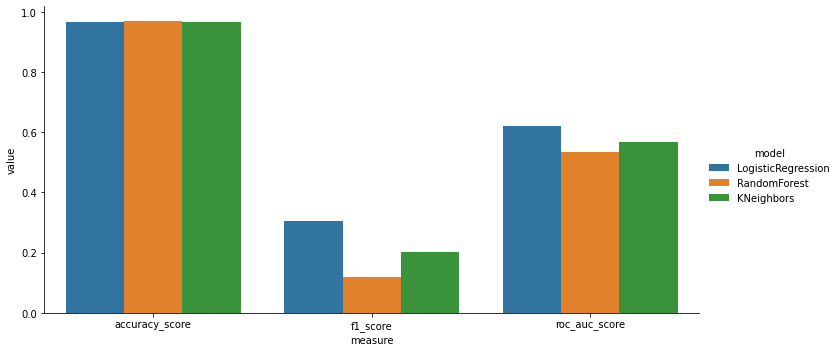

In [ ]:
test_results_df = pd.melt(test_results_df, id_vars="model", var_name="measure", value_name="value")
sns.catplot(x='measure', y='value', hue='model', data=test_results_df, kind='bar', aspect=2)
plt.show()

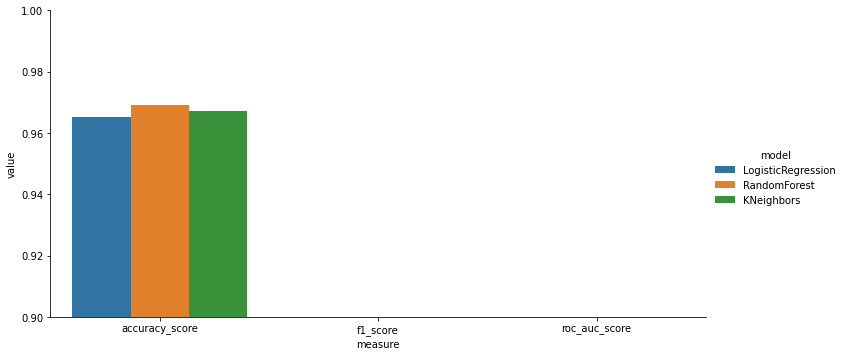

In [ ]:
sns.catplot(x='measure', y='value', hue='model', data=test_results_df, kind='bar', aspect=2)
plt.ylim(0.90, 1)
plt.show()

Na podstawie powyższego wydaje się, że regresja logistyczna wypada tutaj zdecydowanie najlepiej. Co prawda jej 'accuracy_score' jest najmniejszy, ale wysuwa się na prowadzenie w dwóch pozostałych metrykach. 'accuracy score' przyjął takie dobre wartości prawdopodobnie z powodu tego, iż jedna z klas była znacznie liczniejsza od drugiej (faktycznie tak było)

## Odniesienie się do wniosków z walidacji

W tym paragrafie postaramy się odnieść do uwag wystosowanych do nas przez zespół walidacyjny. Będziemy to robić kolejno w punktach. Większość z nich to drobne uwagi (dotyczące między innymi nazewnictwa, subiektywnego braku zrozumienia pewnych idei, pojawiły się też uwagi, które były najzwyczajniej błędne - odniesiemy się jednak do każdej).

1. Dwa razy sprawdzacie braki danych na X_train.
- Poprawione

2. random_seed=42 (nie 420)
- Nie ma to większego znaczenia. 'random_seed=42' przyjął się powszechnie z uwagi na pewne odniesienie kulturowe. Nie jest to jednak błąd merytoryczny.

3. 5 wartości przyjmuje Liability-Assets Flag (nie 6).
- Liability-Assets Flag przyjmuje dwie wartości.

4. Nieczytelne histogramy.
- w naszej opinii są czytelne. Krótkie EDA nie miało na zasadzie szczegółowe zobrazowanie każdej zmiennej, a pewien ogólny obrazek jak mniej więcej te wartości wyglądają.

5. Niezbalansowane klasy.
- Niestety z uwagi na ograniczony czas nie mieliśmy czasu zrobić w pełni optymalnego podziału.

6. Z macierzy korelacji mało co można odcytać, jaki rodzaj korelacji liczony.
- Można odczytać rodzaj korelacji (dla pewności dodatkowo go opisałem w komentarzu). Ponadto, macierz ta, podobnie jak histogramy, ma charakter poglądowy.

7. Oddzielny scaler dla danych testowych.
- Nieprawda, scaler jest ten sam (co prawda została stworzona dodatkowa instancja MinMaxScaler'a, lecz nie została ona użyta - już ją usunąłem bo była to mimo wszystko niepotrzebna zmienna).

8. ROC nie jest krzywą prawdopobobieństwa
- Można ją tak kolokwialnie nazwać.

9. Gini zamiast AUC i wszystkie uwagi odnośnie wyboru metryk
- Wybór metryk był dowolny. Nie musiał być w pełni optymalny, mimo że staraliśmy się, żeby był.

10. Przy outlierach policzyli kwantyle na całym zbiorze danych a nie tylko X_train
- Poprawione